In [10]:
import numpy as np
arr=np.random.randint(1,51,(7,7))
diag_arr=np.diag(arr)
print(diag_arr)

sec_diag=np.diag(np.fliplr(arr))
print(sec_diag)

sum_rw=np.sum(arr,axis=0)
print(sum_rw)

col_sum=np.sum(arr,axis=1)
print(col_sum)

rotated_180=np.rot90(arr)
print(rotated_180)


[12  5  9 46  5 49 33]
[30 47 18 46 28 25 16]
[117 154 167 211 157 221 164]
[164 190 134 167 164 188 184]
[[30 13 26 15 15 32 33]
 [12 47 39 26 25 49 23]
 [50 19 18 19  5 40  6]
 [ 9 23 31 46 49  4 49]
 [11 34  9 33 28 22 30]
 [40  5  5 25 27 25 27]
 [12 49  6  3 15 16 16]]


In [16]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200
age = np.random.randint(18, 66, n)
score = np.random.randint(0, 101, n).astype(object)
non_numeric = ["abc", "-", "X"]
bad_indices = np.random.choice(n, 15, replace=False)
for i in bad_indices:
    score[i] = np.random.choice(non_numeric)

df = pd.DataFrame({
    "Age": age,
    "Score": score
})

df["Age"]=df["Age"].astype(int)
df["Score"]=pd.to_numeric(df["Score"],errors="coerce")
df_clean=df.dropna(subset=["Score"])
df_clean["Score"]=df_clean["Score"].astype(int)
df_clean.head()

mean_score = df_clean["Score"].mean()
print("Mean Score:", mean_score)

top_10 = df_clean.sort_values(by="Score", ascending=False).head(10)
print(top_10)


Mean Score: 48.82702702702703
     Age  Score
8     40    100
17    19    100
115   26     99
162   49     98
169   23     98
87    43     98
102   41     98
74    48     98
104   34     98
140   56     97


/tmp/ipython-input-1123203048.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Score"]=df_clean["Score"].astype(int)


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

np.random.seed(42)
n = 300
age = np.random.randint(18, 61, n)
salary = np.random.randint(20000, 120001, n)
bought = []

for a, s in zip(age, salary):
    if s > 70000 and a < 40:
        prob = 0.8
    else:
        prob = 0.3


    bought.append(np.random.choice([1, 0], p=[prob, 1 - prob]))
df = pd.DataFrame({
    "Age": age,
    "Salary": salary,
    "Bought": bought
})

x = df[["Age", "Salary"]]
y = df["Bought"]


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=42
)


model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)


Confusion Matrix:
 [[36 10]
 [19 25]]

Accuracy: 0.6777777777777778


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score



np.random.seed(42)
x = np.arange(-20, 20.25, 0.25)
x = x.reshape(-1, 1)
noise = np.random.uniform(-40, 40, size=x.shape[0])
y = 4 * (x[:, 0] ** 2) - 3 * x[:, 0] + 12 + noise
df = pd.DataFrame({
    "x": x[:, 0],
    "y": y
})

print("DataFrame head:")
print(df.head())



x = df[["x"]]
y = df["y"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print("\nR2 score on test data:", r2)

x_new = np.array([[10.0]])
y_new_pred = model.predict(x_new)

print("\nPrediction for x = 10:", y_new_pred[0])


DataFrame head:
       x            y
0 -20.00  1661.963210
1 -19.75  1667.557145
2 -19.50  1610.059515
3 -19.25  1559.892679
4 -19.00  1485.481491

R2 score on test data: 0.9969523046486954

Prediction for x = 10: 398.63527447354613


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


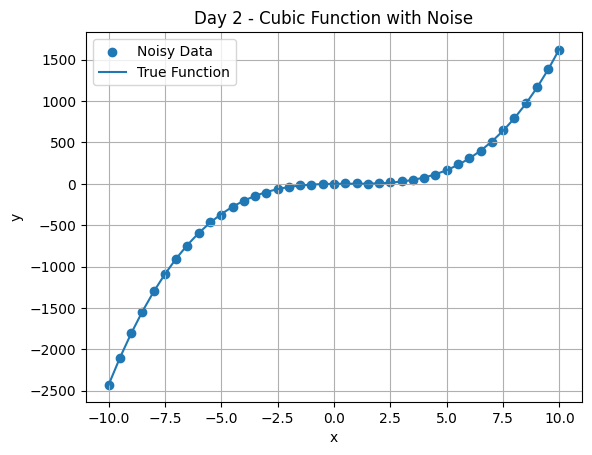

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10.5, 0.5)
noise = np.random.uniform(-10, 10, len(x))

y_noisy = 2*x**3 - 4*x**2 + 3*x + noise
y_true  = 2*x**3 - 4*x**2 + 3*x

plt.scatter(x, y_noisy, label="Noisy Data")
plt.plot(x, y_true, label="True Function")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Day 2 - Cubic Function with Noise")
plt.legend()
plt.grid(True)

plt.savefig("day2_plot.png")
plt.show()
